<a href="https://colab.research.google.com/github/Alex112525/Neural-Networks-with-PyTorch-course/blob/main/Linear_regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

##Generate synthetic data  

The *unsqueeze()* function in PyTorch is used to unsqueeze a tensor by inserting a new dimension of size one at a specified position. An unsqueeze operation always increases the dimension of the output tensor. 

In [2]:
start = 0
final = 1
step = 0.025
X = torch.arange(start, final, step)
print(f"X shape: {X.shape}")
X = X.unsqueeze(dim=1)
print(f"X shape (unsqueeze): {X.shape}")

volume = 0.6
bias = 0.2
noise = torch.randn(X.size()) * 0.06

Y =  volume * X + bias + noise
print(f"Y shape: {Y.shape} ")

X shape: torch.Size([40])
X shape (unsqueeze): torch.Size([40, 1])
Y shape: torch.Size([40, 1]) 


Slicing is a way to extract a portion of a tensor. The syntax for slicing is similar to that of Python lists. For example, if you have a tensor *x* with shape *(3, 4)*, you can slice it like this: *x[0:2, 1:3]*.

In [3]:
Y[:5]

tensor([[0.3025],
        [0.1255],
        [0.2653],
        [0.2443],
        [0.3308]])

We divide the dataset into train and test sets to evaluate how well our machine learning model performs. 
* The train set is used to fit the model, and the statistics of the train set are known. 
* The second set is called the test data set, this set is solely used for predictions. 

In [4]:
train_division = int(0.7 * len(X))

X_train, Y_train = X[:train_division], Y[:train_division]
X_test, Y_test = X[train_division:], Y[train_division:]

In [5]:
len(X_train), len(Y_test)

(28, 12)

In [6]:
def plot_predictions(input_data, input_label, test_data, test_label, prediction=None):
  plt.figure(figsize=(8, 8))

  plt.scatter(input_data, input_label, c="g", s=6, label="Training Data")

  plt.scatter(test_data, test_label, c="y", s=6, label="Test Data")

  if prediction is not None:
    plt.scatter(test_data, prediction, c="r", s=6, label="Predictions")

  plt.legend(prop={"size":12})

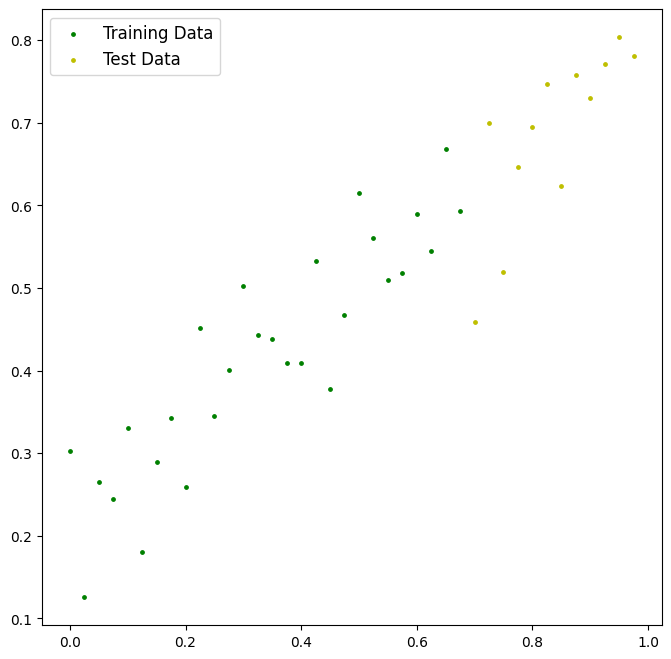

In [7]:
plot_predictions(X_train, Y_train, X_test, Y_test)

##Building the model 

In [8]:
class linearRegression(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.volume = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.volume + x + self.bias

The *torch.manual_seed()* function sets the seed for generating random numbers in PyTorch. It is used to make sure that the results generated by random number generators are reproducible. 
If you set a seed for the random number generator, you can be sure that you will get the same results every time you run your code.

In [9]:
torch.manual_seed(11)
model = linearRegression()

In [10]:
model

linearRegression()

The *state_dict()* function in PyTorch is an important function that is used to save and load the state of a model. It returns a dictionary containing a whole state of the module.

In [11]:
model.state_dict()

OrderedDict([('volume', tensor([0.7376])), ('bias', tensor([1.9459]))])

###Predictions without training

The *torch.inference_mode()* function is used to set the inference mode of PyTorch. Inference mode is used when you want to use your model for prediction. It disables some features that are only used during training, such as dropout and batch normalization.

In [12]:
with torch.inference_mode():
  predict_y = model(X_test)

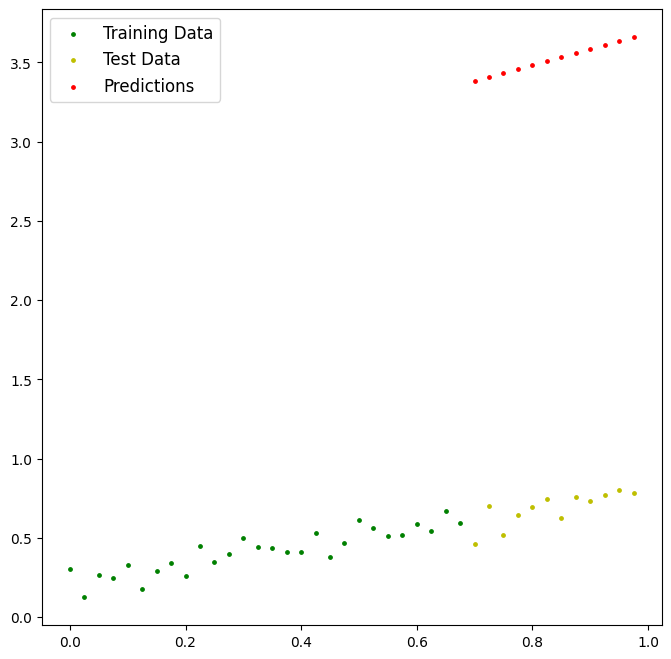

In [13]:
plot_predictions(X_train, Y_train, X_test, Y_test, predict_y)

##Train Model

A loss function is a method of evaluating how well your machine learning algorithm models your featured data set.
It is a mathematical function of the parameters of the machine learning algorithm.

An optimizer is an algorithm that adjusts the learnable parameters of a neural network in order to minimize the error or cost function during training. Optimizers are a key component in deep learning that help improve the accuracy and efficiency of neural networks.

In [14]:
#loss_fn = nn.L1Loss()
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.008)

In [15]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.008
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [16]:
torch.manual_seed(42)

epochs = 300

train_loss = []
test_loss = []

for epoch in range(epochs):
  
  model.train()             #train mode
  y_predict = model(X_train)    #Using fordward 
  loss = loss_fn(y_predict, Y_train)    #Calculate loss
  optimizer.zero_grad()     #Set zeros in gradients
  loss.backward()           #Calculate new gradients
  optimizer.step()          #We use the optimizer to reduce the error

  #Eval model
  model.eval()
  with torch.inference_mode():
    test_predict = model(X_test)
    t_loss = loss_fn(test_predict, Y_test)
    if epoch%20 == 0:
      train_loss.append(loss.detach().numpy())
      test_loss.append(t_loss.detach().numpy())
      print(f"Epoch: {epoch} | Train loss:{round(loss.item(), 6)} | Test loss:{round(t_loss.item(), 6)}")

Epoch: 0 | Train loss:6.784384 | Test loss:7.575151
Epoch: 20 | Train loss:1.854776 | Test loss:2.396559
Epoch: 40 | Train loss:0.512547 | Test loss:0.846947
Epoch: 60 | Train loss:0.147086 | Test loss:0.35218
Epoch: 80 | Train loss:0.047579 | Test loss:0.179458
Epoch: 100 | Train loss:0.020485 | Test loss:0.112596
Epoch: 120 | Train loss:0.013108 | Test loss:0.084043
Epoch: 140 | Train loss:0.011099 | Test loss:0.070868
Epoch: 160 | Train loss:0.010552 | Test loss:0.064463
Epoch: 180 | Train loss:0.010403 | Test loss:0.061249
Epoch: 200 | Train loss:0.010363 | Test loss:0.059607
Epoch: 220 | Train loss:0.010352 | Test loss:0.058759
Epoch: 240 | Train loss:0.010349 | Test loss:0.05832
Epoch: 260 | Train loss:0.010348 | Test loss:0.058091
Epoch: 280 | Train loss:0.010348 | Test loss:0.057972


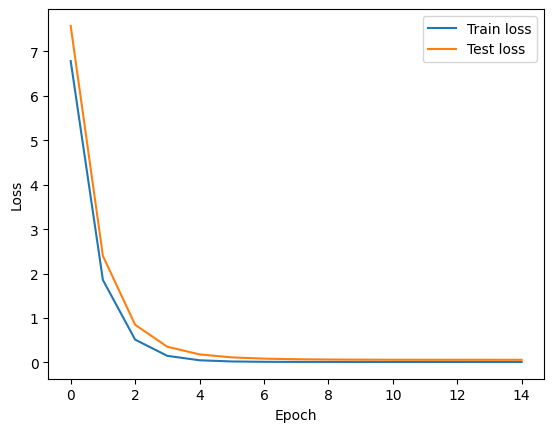

In [17]:
plt.plot(train_loss, label="Train loss")
plt.plot(test_loss, label="Test loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

###Model inference

In [18]:
model.eval()

with torch.inference_mode():
  #model.to(device)
  #X_test = X_test.to(device)
  final_predict = model(X_test)

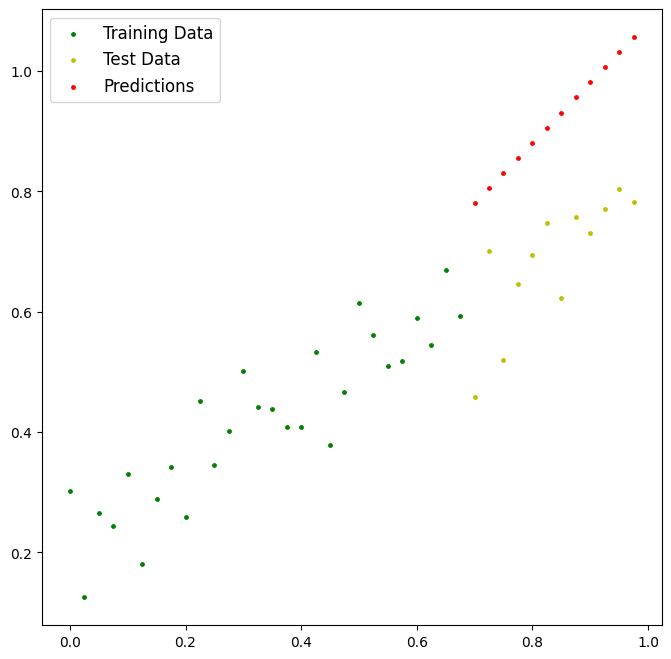

In [19]:
plot_predictions(X_train, Y_train, X_test, Y_test, final_predict)